## Alaska Berry Futures
### Precipitation change over time

March 28, 2023    
Using SNAP precipitation models to investigate how wind speed my affect pollinator movements in AK's future    
http://data.snap.uaf.edu/data/Base/Other/Community_charts_tool_database/    
https://catalog.snap.uaf.edu/geonetwork/srv/eng/catalog.search#/metadata/b3b9581e-cccc-440f-bb2f-0fd6754d8d41    


In [92]:
import pandas as pd
import os
import numpy as np

import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
working_directory = os.getcwd()

all_precip_data =  pd.read_csv(working_directory + "\\SNAP_Community_Climate_Charts_Data_20230313.csv", skiprows=4)

In [94]:
AK_precip = all_precip_data[(all_precip_data['country']=="US")&(all_precip_data['type']=='Precipitation')].copy()



In [95]:

# Specify the CRS of the alaska_ecoregions shapefile
crs = {'init': 'epsg:3338'}

# Load the shapefile into a GeoDataFrame and set the CRS
alaska_ecoregions = gpd.read_file(working_directory + '\\UnifiedEcoregionsAlaska2001\\akecoregions-ShapeFile\\akecoregions.shp', crs=crs)
alaska_ecoregions = alaska_ecoregions.set_crs(epsg=3338)


# Perform a spatial join between the two dataframes based on the latitude and longitude columns
communities = AK_precip[['community', 'latitude', 'longitude']]

# convert the latitude and longitude coordinates to a Point object
geometry = [Point(xy) for xy in zip(AK_precip.longitude, AK_precip.latitude)]
communities = communities.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(communities, crs=crs, geometry=geometry)

# Reproject the alaska_ecoregions GeoDataFrame to the same CRS as the communities GeoDataFrame
alaska_ecoregions = alaska_ecoregions.to_crs(crs)

# Perform the spatial join between the two GeoDataFrames
joined_df = gpd.sjoin(geo_df, alaska_ecoregions, how="left", op="within")

AK_precip = pd.merge(AK_precip, joined_df[['community','LEVEL_2']], on='community', how='left')

C:\Users\LindseyParkinson\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LindseyParkinson\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [96]:
joined_df['LEVEL_2'].unique()

array(['Coastal Rainforests', 'Bering Taiga', 'Aleutian Meadows',
       'Intermontane Boreal', nan, 'Alaska Range Transition',
       'Arctic Tundra', 'Bering Tundra', 'Coast Mountains Transition',
       'Pacific Mountains Transition'], dtype=object)

In [97]:
#AK_precip = pd.merge(AK_precip, joined_df[['community','LEVEL_2']], on='community', how='left')

In [98]:

columns_to_drop = [col for col in AK_precip.columns if 'Min' in col or 'Max' in col]
AK_precip = AK_precip.drop(columns_to_drop, axis=1)


In [99]:
AK_precip

,id,community,region,country,latitude,longitude,type,scenario,resolution,unit,...,aprMean,mayMean,junMean,julMean,augMean,sepMean,octMean,novMean,decMean,LEVEL_2
0,AK1,Afognak,Alaska,US,58.0078,-152.768,Precipitation,prism,2km,mm,...,89.0,168.0,105.0,79.0,91.0,99.0,181.0,133.0,114.0,Coastal Rainforests
1,AK1,Afognak,Alaska,US,58.0078,-152.768,Precipitation,prism,2km,mm,...,89.0,168.0,105.0,79.0,91.0,99.0,181.0,133.0,114.0,Coastal Rainforests
2,AK1,Afognak,Alaska,US,58.0078,-152.768,Precipitation,prism,2km,mm,...,89.0,168.0,105.0,79.0,91.0,99.0,181.0,133.0,114.0,Coastal Rainforests
3,AK1,Afognak,Alaska,US,58.0078,-152.768,Precipitation,prism,2km,mm,...,89.0,168.0,105.0,79.0,91.0,99.0,181.0,133.0,114.0,Coastal Rainforests
4,AK1,Afognak,Alaska,US,58.0078,-152.768,Precipitation,prism,2km,mm,...,89.0,168.0,105.0,79.0,91.0,99.0,181.0,133.0,114.0,Coastal Rainforests
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44195,AK435,Yakutat,Alaska,US,59.5469,-139.727,Precipitation,rcp85,2km,mm,...,338.0,264.0,222.0,208.0,389.0,557.0,697.0,489.0,447.0,Coastal Rainforests
44196,AK435,Yakutat,Alaska,US,59.5469,-139.727,Precipitation,rcp85,2km,mm,...,338.0,264.0,222.0,208.0,389.0,557.0,697.0,489.0,447.0,Coastal Rainforests
44197,AK435,Yakutat,Alaska,US,59.5469,-139.727,Precipitation,rcp85,2km,mm,...,338.0,264.0,222.0,208.0,389.0,557.0,697.0,489.0,447.0,Coastal Rainforests
44198,AK435,Yakutat,Alaska,US,59.5469,-139.727,Precipitation,rcp85,2km,mm,...,338.0,264.0,222.0,208.0,389.0,557.0,697.0,489.0,447.0,Coastal Rainforests


In [100]:
regional_precip = AK_precip.groupby(['LEVEL_2','daterange']).mean().copy()#.reset_index().copy()

In [101]:
regional_precip = regional_precip.drop(columns=['longitude','latitude']).reset_index()

In [102]:
#regional_precip.to_excel('Alaska_regional_precipitation_predictions.xlsx', index=False)

In [103]:
# reshape the data using melt
df = pd.melt(regional_precip, id_vars=['LEVEL_2', 'daterange'], var_name='month', value_name='precipitation')

# rename the columns
df = df.rename(columns={'month': 'month_name'})

# remove the 'Mean' part from the month names
df['month_name'] = df['month_name'].str.replace('Mean', '')

In [119]:
#df.to_excel("alaska_regional_precipitation_predictions_melt.xlsx", index=False)

In [105]:
Interior = df[df['LEVEL_2']=='Intermontane Boreal'].copy()

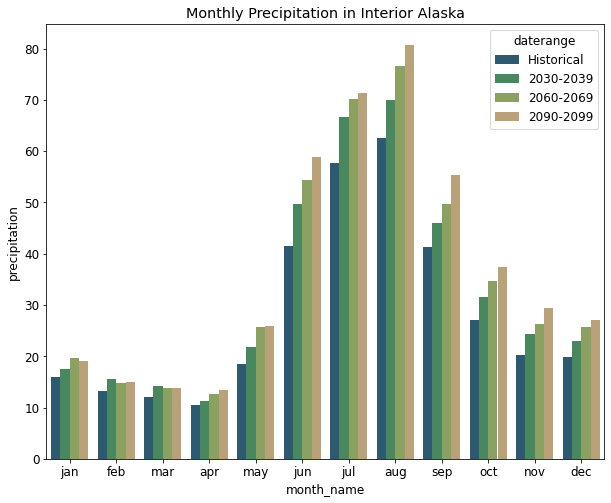

In [118]:
# specify the order of daterange levels
daterange_order = ['Historical', '2030-2039', '2060-2069', '2090-2099']

# create the bar plot with the specified order of daterange levels
sns.barplot(data=Interior, x="month_name", y="precipitation", hue="daterange", palette="gist_earth", hue_order=daterange_order)
plt.title("Monthly Precipitation in Interior Alaska")
plt.savefig("interior_precipitation.png")

In [ ]:
# import pandas as pd
# import geopandas as gpd
# from shapely.geometry import Point

# def merge_point_and_region(point_dataframe, region_dataframe, region_column):
#     # Convert point_dataframe to a GeoDataFrame with Point geometries
#     geometry = [Point(xy) for xy in zip(point_dataframe.longitude, point_dataframe.latitude)]
#     point_gdf = gpd.GeoDataFrame(point_dataframe.drop(['longitude', 'latitude'], axis=1), 
#                                  crs='epsg:4326', 
#                                  geometry=geometry)
    
#     # Reproject region_dataframe to match point_gdf
#     region_gdf = region_dataframe.to_crs(point_gdf.crs)
    
#     # Perform the spatial join
#     joined_gdf = gpd.sjoin(point_gdf, region_gdf, how='left', op='within')
    
#     # Merge the region_column from region_dataframe into point_dataframe
#     return pd.merge(point_dataframe, joined_gdf[['index_right', region_column]], 
#                     left_index=True, right_index=True, how='left')


In [ ]:
# point_dataframe = pd.read_csv('path/to/point/dataframe.csv')
# region_dataframe = gpd.read_file('path/to/region/shapefile.shp')

# merged_dataframe = merge_point_and_region(point_dataframe, region_dataframe, 'region_name')